In [1]:
# ===============================================================
#                   IMPORTING LIBRARIES
# ===============================================================

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')  # Use ggplot style for matplotlib
sns.set_palette('Set2')  # Set default color palette for seaborn

# Text processing
import re  # Regular expressions for text cleaning
from wordcloud import WordCloud, STOPWORDS  # Word clouds and stopwords

# Machine learning / NLP
import torch  # PyTorch for transformer models
from sklearn.feature_extraction.text import TfidfVectorizer  # Feature extraction from text
from sklearn.decomposition import PCA  # Dimensionality reduction for visualization
from sklearn.metrics import classification_report  # Model evaluation metrics

In [3]:
# ===============================================================
#                       UPLOAD DATA (Google Colab)
# ===============================================================

# Upload CSV file(s) from local system into Colab
from google.colab import files

uploaded = files.upload()  # Opens a file chooser to upload files

Saving Reviews.csv to Reviews.csv


In [4]:
# ===============================================================
#                     LOAD DATA
# ===============================================================

# Read the Amazon reviews CSV file into a pandas DataFrame
df = pd.read_csv('Reviews.csv')
print("Original dataset shape:", df.shape)  # Show number of rows and columns

# For quick experimentation, use only the first 500 rows
df = df.head(500)
print("Subset dataset shape:", df.shape)

Original dataset shape: (568454, 10)
Subset dataset shape: (500, 10)


In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
# ===============================================================
#                     EXAMINE SAMPLE REVIEW
# ===============================================================

# Select and print a single example review to understand the text content
example = df['Text'][50]
print("Sample review (50th row):")
print(example)

Sample review (50th row):
This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [7]:
# ===============================================================
#                   NLTK SETUP & TOKENIZATION
# ===============================================================

# Step 1: Ensure a stable version of NLTK is installed
!pip uninstall -y nltk
!pip install nltk==3.7  # Use a stable version

# Step 2: Remove any leftover NLTK data to avoid conflicts
!rm -rf /root/nltk_data

# Step 3: Import NLTK and download necessary resources
import nltk
nltk.download('punkt')  # Tokenizer models for splitting text into words

# Step 4: Import word tokenizer
from nltk.tokenize import word_tokenize

# Step 5: Tokenize a sample review to inspect individual words
example = df['Text'][50]
tokens = word_tokenize(example)
print("First 10 tokens from sample review:")
print(tokens[:10])

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.7 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


First 10 tokens from sample review:
['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']


In [8]:
# ===============================================================
#                   PART-OF-SPEECH (POS) TAGGING
# ===============================================================

# Download the POS tagger model from NLTK
nltk.download('averaged_perceptron_tagger')

# Run POS tagging on the tokenized sample review
# Each token is tagged with its part of speech (e.g., noun, verb, adjective)
tagged = nltk.pos_tag(tokens)

# Print the first 10 token-POS pairs to inspect the results
print("First 10 tokens with POS tags:")
print(tagged[:10])


First 10 tokens with POS tags:
[('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [9]:
# ===============================================================
#                   NAMED ENTITY (NE) RECOGNITION
# ===============================================================

# Download the NE chunker model from NLTK
nltk.download('maxent_ne_chunker')

# Download the words corpus if not already present
nltk.download('words')

# Run Named Entity chunking on the POS-tagged tokens
# This identifies entities like PERSON, ORGANIZATION, GPE (locations), etc.
entities = nltk.chunk.ne_chunk(tagged)

# Pretty-print the NE tree to inspect identified entities
entities.pprint()


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [10]:
# ===============================================================
#                   SENTIMENT ANALYSIS SETUP (VADER)
# ===============================================================

# Download the VADER lexicon for sentiment scoring
nltk.download('vader_lexicon')

# Import VADER SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# Import tqdm for progress bars when processing multiple reviews
from tqdm.notebook import tqdm

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# VADER is a lexicon and rule-based sentiment analysis tool
# that gives positive, neutral, negative, and compound scores for text


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [11]:
# ===============================================================
#                   TEST VADER SENTIMENT ON EXAMPLES
# ===============================================================

# Example 1: Positive sentiment
example_text = 'I am so happy!'

# Get VADER sentiment scores
scores = sia.polarity_scores(example_text)

# Print the results
print(f"VADER sentiment scores for example text:\n{scores}")


VADER sentiment scores for example text:
{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}


In [12]:
# ===============================================================
#                   TEST VADER SENTIMENT ON NEGATIVE EXAMPLE
# ===============================================================

# Example 2: Negative sentiment
example_text = 'This is the worst thing ever.'

# Get VADER sentiment scores
scores = sia.polarity_scores(example_text)

# Print the results
print(f"VADER sentiment scores for negative example:\n{scores}")


VADER sentiment scores for negative example:
{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}


In [13]:
# ===============================================================
#          TEST VADER SENTIMENT ON A SAMPLE REVIEW
# ===============================================================

# Use a sample review from the dataset
example_text = example  # 50th review from df['Text']

# Get VADER sentiment scores for the sample review
scores = sia.polarity_scores(example_text)

# Print the results
print(f"Sample review text:\n{example_text}\n")
print(f"VADER sentiment scores:\n{scores}")


Sample review text:
This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.

VADER sentiment scores:
{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [14]:
# ===============================================================
#             APPLY VADER SENTIMENT TO FULL DATASET
# ===============================================================

# Initialize an empty dictionary to store sentiment scores
res = {}

# Loop through each review in the dataset
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']          # Review text
    myid = row['Id']            # Unique review ID

    # Compute VADER sentiment scores for each review
    res[myid] = sia.polarity_scores(text)

# The result 'res' will have review IDs as keys and sentiment score dictionaries as values


  0%|          | 0/500 [00:00<?, ?it/s]

In [15]:
# ===============================================================
#                 CONVERT SENTIMENT SCORES TO DATAFRAME
# ===============================================================

# Convert the VADER results dictionary to a DataFrame and transpose it
vaders = pd.DataFrame(res).T

# Reset index to make 'Id' a column instead of the index
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

# Merge the VADER sentiment scores with the original dataset to include review metadata
vaders = vaders.merge(df, how='left')

# Now 'vaders' DataFrame contains:
#   - VADER sentiment scores: neg, neu, pos, compound
#   - Original review text, score, summary, and other metadata


In [16]:
# ===============================================================
#                INSPECT VADER SENTIMENT DATAFRAME
# ===============================================================

# Display the first few rows of the merged DataFrame
# to verify that VADER sentiment scores and metadata are correctly aligned
vaders.head()


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
# ===============================================================
#                  IMPORT TRANSFORMERS FOR ROBERTA
# ===============================================================

# Import AutoTokenizer and AutoModelForSequenceClassification
# from Hugging Face Transformers library for sentiment analysis
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

# Import softmax from scipy to convert raw model outputs into probabilities
from scipy.special import softmax

# These imports are required to use the RoBERTa-based sentiment model
# which will complement VADER with a transformer-based approach


In [18]:
# ===============================================================
#              INITIALIZE ROBERTA SENTIMENT MODEL
# ===============================================================

# Define the pre-trained RoBERTa sentiment analysis model from CardiffNLP
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Load the tokenizer corresponding to the model
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Load the pre-trained model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# This RoBERTa model will predict negative, neutral, and positive sentiment
# for each review, complementing the VADER lexicon-based scores


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [19]:
# ===============================================================
#         COMPARE VADER SENTIMENT ON SAMPLE REVIEW
# ===============================================================

# Print the sample review text
print("Sample review text:")
print(example)

# Get VADER sentiment scores for the sample review
vader_scores = sia.polarity_scores(example)

# Print VADER sentiment scores
print("\nVADER sentiment scores:")
print(vader_scores)

# This allows us to compare VADER's output with RoBERTa's sentiment scores later


Sample review text:
This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.

VADER sentiment scores:
{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [20]:
# ===============================================================
#          COMPUTE ROBERTA SENTIMENT ON SAMPLE REVIEW
# ===============================================================

# Encode the sample review text for RoBERTa
encoded_text = tokenizer(example, return_tensors='pt')

# Pass the encoded text through the RoBERTa model
output = model(**encoded_text)

# Extract raw model outputs (logits) and convert to numpy array
scores = output[0][0].detach().numpy()

# Apply softmax to convert logits into probabilities
scores = softmax(scores)

# Create a dictionary mapping sentiment categories to their probabilities
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

# Print RoBERTa sentiment scores for the sample review
print("RoBERTa sentiment scores:")
print(scores_dict)

# This allows comparison of transformer-based sentiment with VADER output


RoBERTa sentiment scores:
{'roberta_neg': np.float32(0.97635514), 'roberta_neu': np.float32(0.020687465), 'roberta_pos': np.float32(0.0029573706)}


In [21]:
# ===============================================================
#          FUNCTION TO COMPUTE ROBERTA SENTIMENT SCORES
# ===============================================================

def polarity_scores_roberta(example):
    """
    Computes RoBERTa sentiment scores for a given text.

    Args:
        example (str): The text/review to analyze.

    Returns:
        dict: Dictionary with probabilities for negative, neutral, and positive sentiment.
    """
    # Encode the text for the RoBERTa model
    encoded_text = tokenizer(example, return_tensors='pt')

    # Pass the encoded text through the model
    output = model(**encoded_text)

    # Extract logits and convert to numpy array
    scores = output[0][0].detach().numpy()

    # Apply softmax to convert logits to probabilities
    scores = softmax(scores)

    # Create dictionary of sentiment probabilities
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

    return scores_dict

# This function allows batch processing of reviews for RoBERTa sentiment analysis


In [22]:
# ===============================================================
#      APPLY VADER AND ROBERTA SENTIMENT TO FULL DATASET
# ===============================================================

# Initialize a dictionary to store combined sentiment scores
res = {}

# Loop through each review in the dataset
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']     # Review text
        myid = row['Id']       # Unique review ID

        # Compute VADER sentiment scores
        vader_result = sia.polarity_scores(text)

        # Rename VADER keys to avoid conflicts
        vader_result_rename = {f"vader_{key}": value for key, value in vader_result.items()}

        # Compute RoBERTa sentiment scores using the previously defined function
        roberta_result = polarity_scores_roberta(text)

        # Merge both VADER and RoBERTa results
        both = {**vader_result_rename, **roberta_result}

        # Store the combined scores in the dictionary
        res[myid] = both

    except RuntimeError:
        # Catch and report any runtime errors for problematic rows
        print(f'Broke for id {myid}')

# 'res' now contains combined sentiment scores for all reviews in the dataset


  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [23]:
# ===============================================================
#       CONVERT COMBINED SENTIMENT SCORES TO DATAFRAME
# ===============================================================

# Convert the dictionary of combined VADER and RoBERTa scores to a DataFrame
results_df = pd.DataFrame(res).T

# Reset the index to move 'Id' from index to a column
results_df = results_df.reset_index().rename(columns={'index': 'Id'})

# Merge the sentiment scores with the original dataset to include review metadata
results_df = results_df.merge(df, how='left')

# Now 'results_df' contains:
#   - VADER sentiment scores: vader_neg, vader_neu, vader_pos, vader_compound
#   - RoBERTa sentiment scores: roberta_neg, roberta_neu, roberta_pos
#   - Original review metadata: Text, Score, Summary, etc.


In [24]:
# ===============================================================
#            INSPECT COLUMNS OF THE RESULTS DATAFRAME
# ===============================================================

# Display all column names in the results dataframe
# to verify that VADER, RoBERTa scores, and metadata are included
results_df.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [25]:
# ===============================================================
#     INSPECT HIGHEST POSITIVE ROBERTA SCORE FOR 1-STAR REVIEWS
# ===============================================================

# Find the 1-star review with the highest RoBERTa positive sentiment score
most_positive_1star = results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

# Print the review text
print("1-star review with highest RoBERTa positive score:")
print(most_positive_1star)

# This helps identify reviews where RoBERTa disagrees with the star rating,
# useful for error analysis or model evaluation


1-star review with highest RoBERTa positive score:
I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.


In [26]:
# ===============================================================
#     INSPECT HIGHEST POSITIVE VADER SCORE FOR 1-STAR REVIEWS
# ===============================================================

# Find the 1-star review with the highest VADER positive sentiment score
most_positive_1star_vader = results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

# Print the review text
print("1-star review with highest VADER positive score:")
print(most_positive_1star_vader)

# This helps identify cases where VADER sentiment contradicts the star rating,
# useful for model comparison and error analysis


1-star review with highest VADER positive score:
So we cancelled the order.  It was cancelled without any problem.  That is a positive note...


In [27]:
# ===============================================================
#     INSPECT HIGHEST NEGATIVE ROBERTA SCORE FOR 5-STAR REVIEWS
# ===============================================================

# Find the 5-star review with the highest RoBERTa negative sentiment score
most_negative_5star = results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

# Print the review text
print("5-star review with highest RoBERTa negative score:")
print(most_negative_5star)

# This helps identify cases where RoBERTa sentiment contradicts the star rating,
# useful for error analysis and understanding model limitations


5-star review with highest RoBERTa negative score:
this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault


In [28]:
# ===============================================================
#     INSPECT HIGHEST NEGATIVE VADER SCORE FOR 5-STAR REVIEWS
# ===============================================================

# Find the 5-star review with the highest VADER negative sentiment score
most_negative_5star_vader = results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

# Print the review text
print("5-star review with highest VADER negative score:")
print(most_negative_5star_vader)

# This helps identify cases where VADER sentiment contradicts the star rating,
# useful for comparing model outputs and evaluating performance


5-star review with highest VADER negative score:
this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault


In [30]:
# ===============================================================
#          INITIALIZE HUGGINGFACE SENTIMENT PIPELINE
# ===============================================================

from transformers import pipeline
# Load a pre-built sentiment analysis pipeline from Hugging Face
# This pipeline can classify text as positive or negative sentiment
sent_pipeline = pipeline("sentiment-analysis")

# This provides a simple, high-level alternative to VADER and RoBERTa models
# Useful for quick sentiment predictions on sample texts


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [31]:
# ===============================================================
#          TEST HUGGINGFACE SENTIMENT PIPELINE ON POSITIVE TEXT
# ===============================================================

# Use the Hugging Face pipeline to predict sentiment for a positive text
example_text = 'I love sentiment analysis!'
prediction = sent_pipeline(example_text)

# Print the predicted sentiment
print(f"Text: {example_text}")
print(f"Predicted sentiment: {prediction}")

# This demonstrates the pipeline's ability to classify clearly positive statements


Text: I love sentiment analysis!
Predicted sentiment: [{'label': 'POSITIVE', 'score': 0.9997853636741638}]


In [32]:
# ===============================================================
#        TEST HUGGINGFACE SENTIMENT PIPELINE ON NEUTRAL TEXT
# ===============================================================

# Example of a neutral/factual statement
example_text = 'Make sure to like and subscribe!'
prediction = sent_pipeline(example_text)

# Print the predicted sentiment
print(f"Text: {example_text}")
print(f"Predicted sentiment: {prediction}")

# This demonstrates how the pipeline handles statements that are
# more neutral or directive rather than clearly positive or negative


Text: Make sure to like and subscribe!
Predicted sentiment: [{'label': 'POSITIVE', 'score': 0.9991742968559265}]


In [33]:
# ===============================================================
#        TEST HUGGINGFACE SENTIMENT PIPELINE ON NEGATIVE TEXT
# ===============================================================

# Example of a clearly negative expression
example_text = 'booo'
prediction = sent_pipeline(example_text)

# Print the predicted sentiment
print(f"Text: {example_text}")
print(f"Predicted sentiment: {prediction}")

# This demonstrates how the pipeline identifies negative sentiment,
# useful for verifying model behavior on short or informal texts


Text: booo
Predicted sentiment: [{'label': 'NEGATIVE', 'score': 0.9936267137527466}]


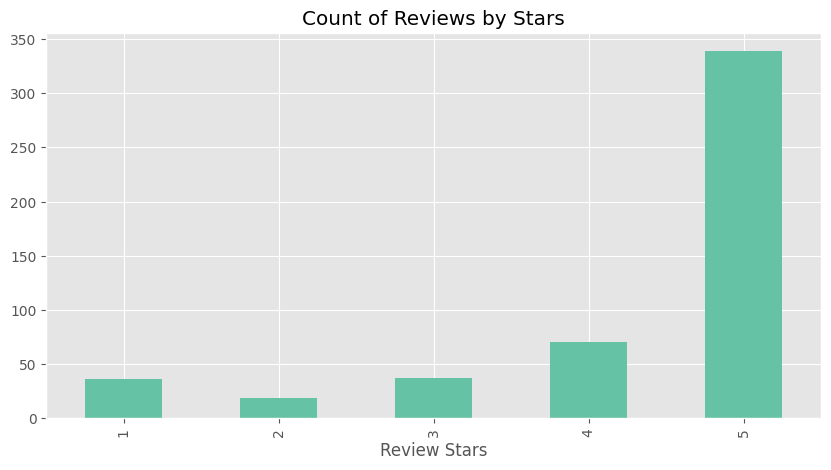

In [34]:
# ===============================================================
#          BAR PLOT OF REVIEW COUNTS BY STAR RATING
# ===============================================================

# Plot the distribution of reviews across star ratings
ax = df['Score'].value_counts().sort_index().plot(
    kind='bar',
    title='Count of Reviews by Stars',
    figsize=(10, 5)
)

# Label the x-axis
ax.set_xlabel('Review Stars')

# Display the plot
plt.show()

# This visualization helps stakeholders quickly see the distribution
# of reviews and identify whether there is class imbalance in the dataset


/tmp/ipython-input-2766978399.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


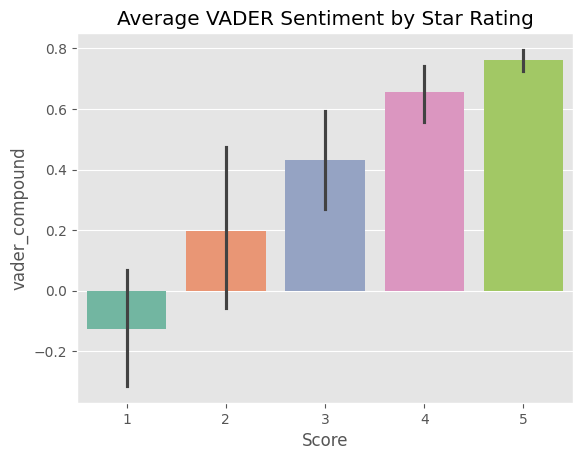

In [35]:
# ===============================================================
#       BAR PLOT OF AVERAGE VADER SENTIMENT BY STAR RATING
# ===============================================================

# Create a bar plot showing the average VADER compound sentiment
# for each star rating
ax = sns.barplot(
    data=results_df,
    x='Score',
    y='vader_compound',
    palette='Set2'
)

# Set the plot title
ax.set_title('Average VADER Sentiment by Star Rating')

# Display the plot
plt.show()

# This visualization allows stakeholders to easily see the
# correlation between star ratings and VADER sentiment scores,
# showing whether higher stars correspond to more positive sentiment


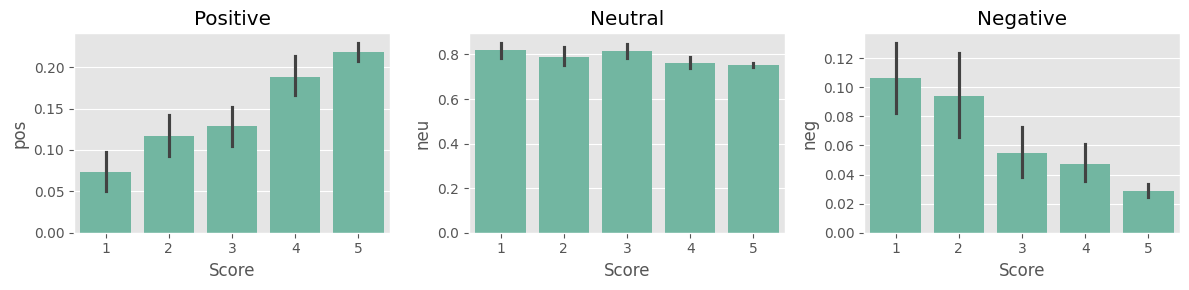

In [36]:
# ===============================================================
#       MULTI-BAR PLOTS OF VADER SENTIMENT COMPONENTS
# ===============================================================

# Create a 1x3 subplot to show VADER sentiment components separately
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Bar plot of positive sentiment by star rating
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
axs[0].set_title('Positive')

# Bar plot of neutral sentiment by star rating
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
axs[1].set_title('Neutral')

# Bar plot of negative sentiment by star rating
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[2].set_title('Negative')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# This visualization allows stakeholders to easily see how
# positive, neutral, and negative sentiment components vary
# across star ratings, providing a detailed breakdown of VADER scores


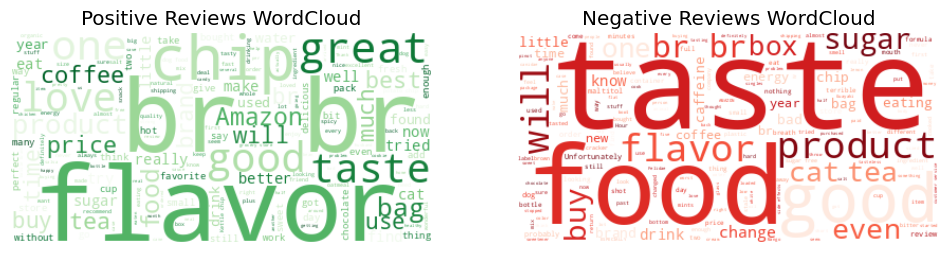

In [38]:
# ===============================================================
#                 WORD CLOUDS OF POSITIVE AND NEGATIVE REVIEWS
# ===============================================================

# Combine all texts for positive (4-5 stars) and negative (1-2 stars) reviews
positive_text = ' '.join(results_df[results_df['Score'] >= 4]['Text'])
negative_text = ' '.join(results_df[results_df['Score'] <= 2]['Text'])

# Generate WordClouds
wc_pos = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    colormap='Greens'
).generate(positive_text)

wc_neg = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    colormap='Reds'
).generate(negative_text)

# Plot the word clouds side by side
plt.figure(figsize=(12,5))

# Positive reviews
plt.subplot(1,2,1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")

# Negative reviews
plt.subplot(1,2,2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")

plt.show()

# This visualization helps stakeholders quickly see the most frequent
# words in positive vs. negative reviews, making sentiment patterns intuitive


/tmp/ipython-input-1672385943.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


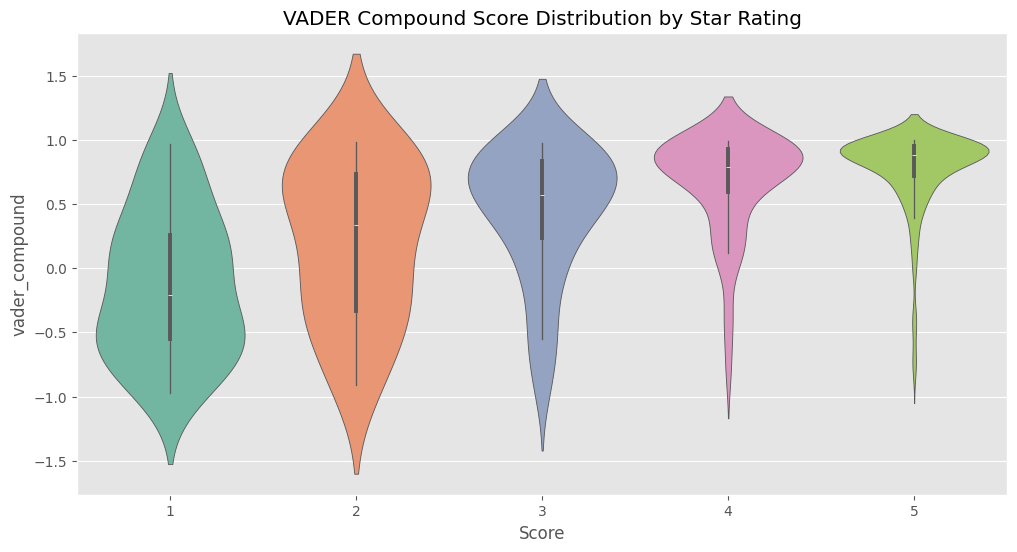

/tmp/ipython-input-1672385943.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


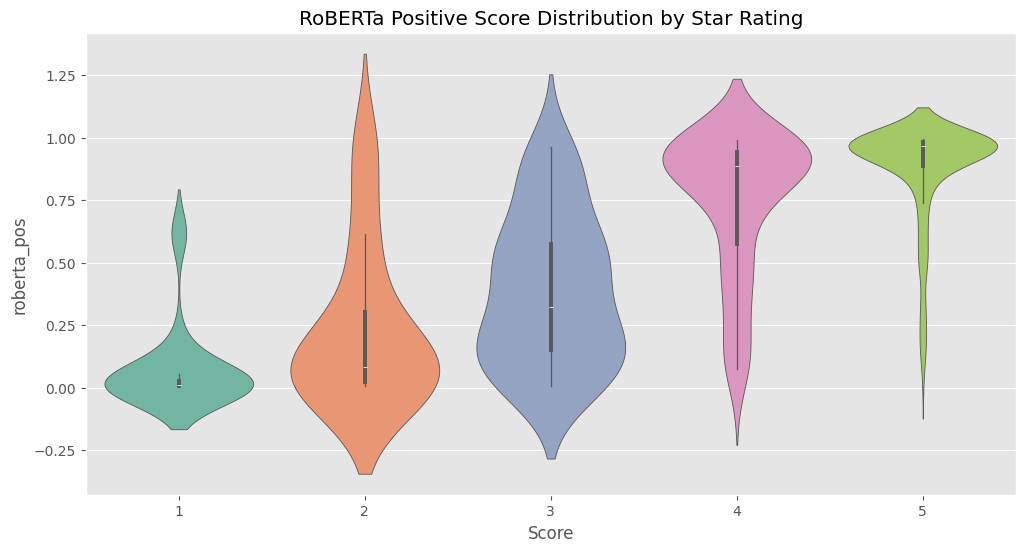

In [39]:
# ===============================================================
#       VIOLIN PLOTS OF SENTIMENT SCORES BY STAR RATING
# ===============================================================

# VADER compound score distribution across star ratings
plt.figure(figsize=(12,6))
sns.violinplot(
    data=results_df,
    x='Score',
    y='vader_compound',
    palette='Set2'
)
plt.title('VADER Compound Score Distribution by Star Rating')
plt.show()

# RoBERTa positive sentiment score distribution across star ratings
plt.figure(figsize=(12,6))
sns.violinplot(
    data=results_df,
    x='Score',
    y='roberta_pos',
    palette='Set2'
)
plt.title('RoBERTa Positive Score Distribution by Star Rating')
plt.show()

# Violin plots show the full distribution of sentiment scores for each star rating,
# including median, quartiles, and density, giving stakeholders a deeper understanding
# of sentiment spread beyond average values
